# Top Skills Required for Data Analyst Jobs in Singapore

SerpApi is used to scrape Google Jobs for listing of Data Analyst jobs in Singapore. The data is then cleaned and the key information extracted to find out the top skills commonly required for Data Analyst job listings.

Data is then plotted in a bar chart to visualise the findings.

In [ ]:
# modules Used
from serpapi import GoogleSearch
import json
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams  
import seaborn as sns
plt.style.use('fivethirtyeight')

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
%config InlineBackend.figure_format = 'retina'

In [ ]:
# serpapi parameters

params = {
	"engine": "google_jobs",
	"q": "data analyst singapore",
	"hl": "en",
	"gl" : "sg",
	"api_key": "apikey",
	"start" : 0
}

# create empty list
google_jobs_results = []

# fill list with search results
while True:
	search = GoogleSearch(params)   			
	result_dict = search.get_dict()

	if 'error' in result_dict:
		break

	for result in result_dict['jobs_results']:
		google_jobs_results.append(result)
	
	params['start'] += 10

In [3]:
# create dataframe from list
df = pd.DataFrame(google_jobs_results)

# (optional) save dataframe into excel for future use
df.to_excel ('Google_Jobs_Data_Analyst_Singapore.xlsx', index=False, header=True)

In [3]:
# view dataframe
df

,st,company_name,location,via,description,related_links,extensions,detected_extensions,job_id,thumbnail
0,Senior Data Analyst,Ng Teng Fong General Hospital,Singapore,via LinkedIn,"If you are keen to explore data analytics job,...",[{'link': 'https://www.google.com/search?gl=sg...,"['23 hours ago', 'Full–time']","{'posted_at': '23 hours ago', 'schedule_type':...",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,NaN
1,Data Analyst,SINGTEL MOBILE SINGAPORE PTE. LTD.,Singapore,via MyCareersFuture,Job Responsibilities:\n• Develop and deploy an...,"[{'link': 'http://gomo.sg/', 'text': 'gomo.sg'...","['6 days ago', '$4.5K–$9K a month', 'Contractor']","{'posted_at': '6 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN
2,Digital and Data Analyst,Shell,Singapore,via LinkedIn,Where you fit in\n\nYou will be based in our i...,"[{'link': 'http://www.shell.com/', 'text': 'sh...","['3 days ago', 'Full–time']","{'posted_at': '3 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEaWdpdGFsIGFuZCBEYXRhIEFuYW...,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,Data Analyst,Aon Corporation,Singapore,via Aon,Data Analyst\n\nThe successful candidate will ...,"[{'link': 'http://www.aon.com/', 'text': 'aon....","['3 days ago', 'Full–time']","{'posted_at': '3 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...
4,Big Data Analyst,OPUS IT SERVICES PTE LTD,Singapore,via MyCareersFuture,o Experience with Linux platform.\n\no Able to...,"[{'link': 'http://www.opusit.com.sg/', 'text':...","['22 days ago', '$4K–$8K a month', 'Full–time']","{'posted_at': '22 days ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJCaWcgRGF0YSBBbmFseXN0IiwiaH...,https://encrypted-tbn0.gstatic.com/images?q=tb...
...,...,...,...,...,...,...,...,...,...,...
225,Junior Data Analyst,Collabera Singapore,Singapore,via LinkedIn,Role:\n• Responsible for supporting and execut...,[{'link': 'https://www.google.com/search?hl=en...,"['13 days ago', 'Contractor']","{'posted_at': '13 days ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...
226,E-commerce Data Analyst - Logistic,TikTok,Singapore,via LinkedIn,Responsibilities\n\nTikTok is the leading dest...,[{'link': 'https://www.google.com/search?hl=en...,"['5 days ago', 'Full–time']","{'posted_at': '5 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJFLWNvbW1lcmNlIERhdGEgQW5hbH...,https://encrypted-tbn0.gstatic.com/images?q=tb...
227,Binance Accelerator Programme - Junior Data An...,Binance,Singapore,via LinkedIn,Binance is the global blockchain company behin...,[{'link': 'https://www.google.com/search?hl=en...,"['5 days ago', 'Full–time']","{'posted_at': '5 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJCaW5hbmNlIEFjY2VsZXJhdG9yIF...,https://encrypted-tbn0.gstatic.com/images?q=tb...
228,Data Analyst,Pan-United Corporation Ltd,Singapore,via LinkedIn,Job Responsibilities\n• Analyze raw data: asse...,"[{'link': 'http://www.panunited.com.sg/', 'tex...","['27 days ago', 'Full–time']","{'posted_at': '27 days ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [4]:
# set keywords to search in the dataframe

keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
]

keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords = keywords_programming + keywords_analyst_tools
keywords

In [8]:
# create blank column in dataframe
df['description_tokens'] = ""

for index, row in df.iterrows():

    # lowercase description
    detail = row.description.lower()
    # split sentence into words
    detail = word_tokenize(detail)    

    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic')]
    
    # merge multi-word phrases into single tokens
    tokenizer = MWETokenizer(multi_tokens)

    detail = tokenizer.tokenize(detail)

    # create list from set created in previous "detail"
    detail = list(set(detail))

    # create list containing only keywords required
    detail = [word for word in detail if word in keywords]

    # replace 'key' in list with 'value'
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
        df.at[index, 'description_tokens'] = detail
df

,st,company_name,location,via,description,related_links,extensions,detected_extensions,job_id,thumbnail,description_tokens
0,Senior Data Analyst,Ng Teng Fong General Hospital,Singapore,via LinkedIn,"If you are keen to explore data analytics job,...",[{'link': 'https://www.google.com/search?gl=sg...,"['23 hours ago', 'Full–time']","{'posted_at': '23 hours ago', 'schedule_type':...",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,NaN,[]
1,Data Analyst,SINGTEL MOBILE SINGAPORE PTE. LTD.,Singapore,via MyCareersFuture,Job Responsibilities:\n• Develop and deploy an...,"[{'link': 'http://gomo.sg/', 'text': 'gomo.sg'...","['6 days ago', '$4.5K–$9K a month', 'Contractor']","{'posted_at': '6 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,"[python, r, shell, unix, sql, tableau]"
2,Digital and Data Analyst,Shell,Singapore,via LinkedIn,Where you fit in\n\nYou will be based in our i...,"[{'link': 'http://www.shell.com/', 'text': 'sh...","['3 days ago', 'Full–time']","{'posted_at': '3 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEaWdpdGFsIGFuZCBEYXRhIEFuYW...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[shell, excel, power_bi]"
3,Data Analyst,Aon Corporation,Singapore,via Aon,Data Analyst\n\nThe successful candidate will ...,"[{'link': 'http://www.aon.com/', 'text': 'aon....","['3 days ago', 'Full–time']","{'posted_at': '3 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[tableau, c, java, python]"
4,Big Data Analyst,OPUS IT SERVICES PTE LTD,Singapore,via MyCareersFuture,o Experience with Linux platform.\n\no Able to...,"[{'link': 'http://www.opusit.com.sg/', 'text':...","['22 days ago', '$4K–$8K a month', 'Full–time']","{'posted_at': '22 days ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJCaWcgRGF0YSBBbmFseXN0IiwiaH...,https://encrypted-tbn0.gstatic.com/images?q=tb...,[linux]
...,...,...,...,...,...,...,...,...,...,...,...
225,Junior Data Analyst,Collabera Singapore,Singapore,via LinkedIn,Role:\n• Responsible for supporting and execut...,[{'link': 'https://www.google.com/search?hl=en...,"['13 days ago', 'Contractor']","{'posted_at': '13 days ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[python, r, sql, tableau]"
226,E-commerce Data Analyst - Logistic,TikTok,Singapore,via LinkedIn,Responsibilities\n\nTikTok is the leading dest...,[{'link': 'https://www.google.com/search?hl=en...,"['5 days ago', 'Full–time']","{'posted_at': '5 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJFLWNvbW1lcmNlIERhdGEgQW5hbH...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[python, sql]"
227,Binance Accelerator Programme - Junior Data An...,Binance,Singapore,via LinkedIn,Binance is the global blockchain company behin...,[{'link': 'https://www.google.com/search?hl=en...,"['5 days ago', 'Full–time']","{'posted_at': '5 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJCaW5hbmNlIEFjY2VsZXJhdG9yIF...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[python, r, sql, power_bi, tableau, qlik]"
228,Data Analyst,Pan-United Corporation Ltd,Singapore,via LinkedIn,Job Responsibilities\n• Analyze raw data: asse...,"[{'link': 'http://www.panunited.com.sg/', 'tex...","['27 days ago', 'Full–time']","{'posted_at': '27 days ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[python, sql, java]"


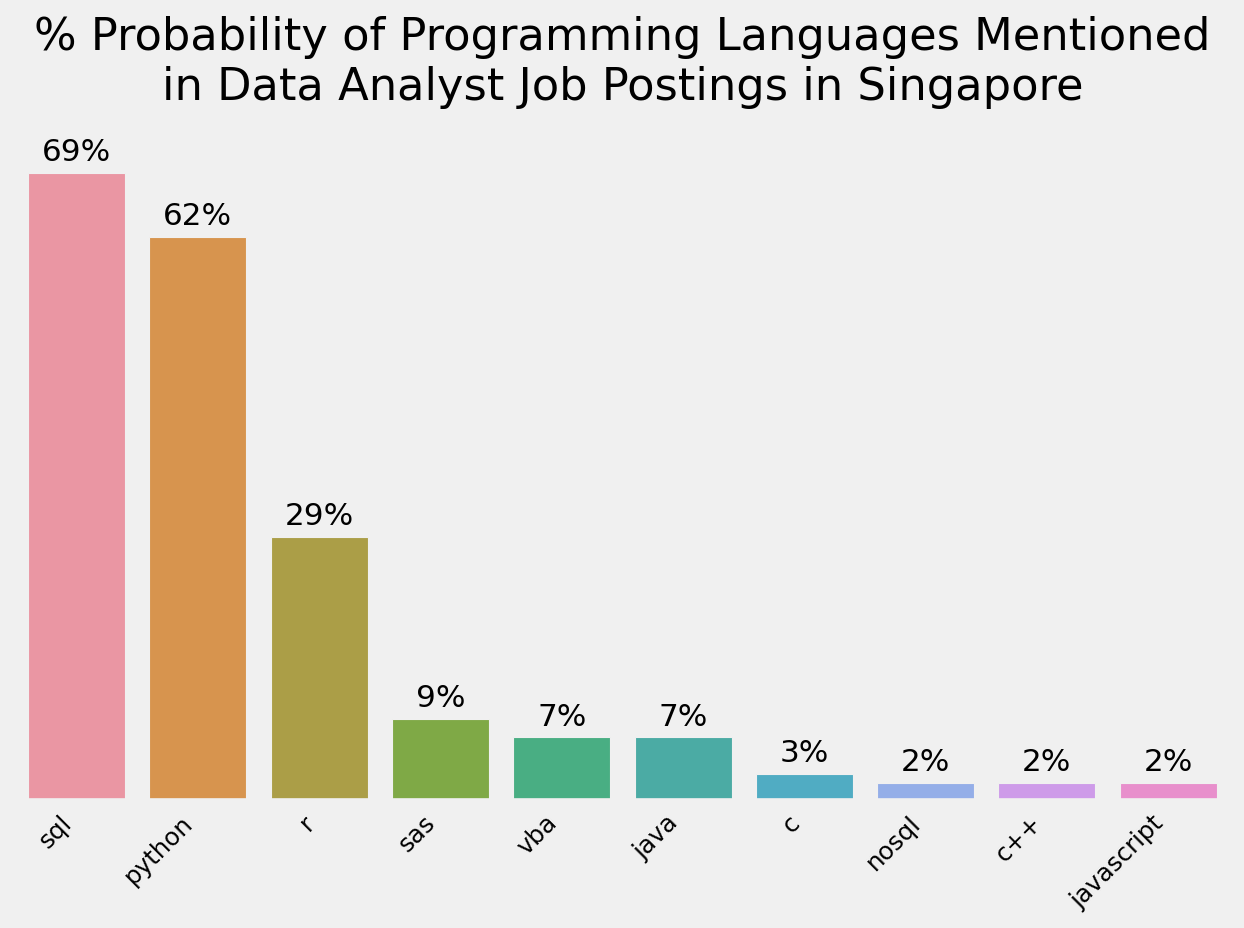

   keywords_programming  counts  percentage
0                   sql     158        69.0
1                python     142        62.0
3                     r      66        29.0
6                   sas      20         9.0
8                   vba      16         7.0
9                  java      15         7.0
14                    c       7         3.0
21                nosql       5         2.0
23                  c++       5         2.0
25           javascript       4         2.0


In [80]:
# create new dataframe of keyword counts and percentage of occurrence
count_keywords = pd.DataFrame(df.description_tokens.sum()).value_counts().rename_axis('keywords_programming').reset_index(name='counts')
length = len(df)
count_keywords['percentage'] = round(100 * count_keywords.counts / length,0)
count_keywords = count_keywords[count_keywords.keywords_programming.isin(keywords_programming)]
count_keywords = count_keywords.head(10)

# plot data in barplot
g = sns.barplot(x="keywords_programming", y="percentage", data=count_keywords)

# data label in barplot
g.bar_label(g.containers[0],fmt="%g%%",padding=3)

# set margin off the edge of the plot figure
g.margins(y=0.1)

# customise plot appearance
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.set_yticks([])
plt.xticks(rotation = 45, ha='right')
plt.title("% Probability of Programming Languages Mentioned\nin Data Analyst Job Postings in Singapore")
plt.tight_layout()

plt.show(g)

print(count_keywords)

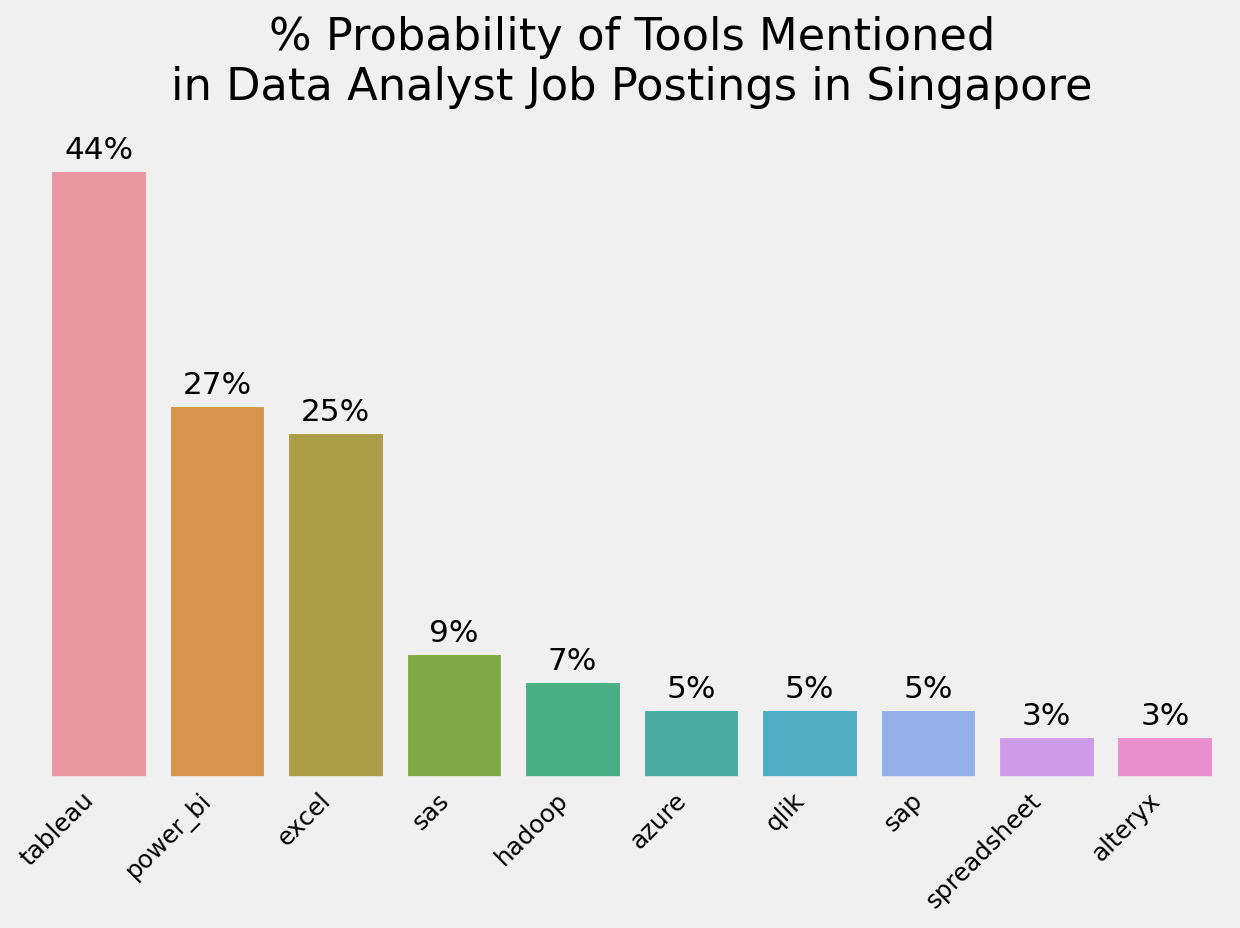

   keywords_analyst_tools  counts  percentage
2                 tableau     101        44.0
4                power_bi      63        27.0
5                   excel      58        25.0
6                     sas      20         9.0
7                  hadoop      16         7.0
10                  azure      12         5.0
11                   qlik      11         5.0
12                    sap      11         5.0
13            spreadsheet       7         3.0
15                alteryx       7         3.0


In [82]:
# create new dataframe of keyword counts and percentage of occurrence
count_keywords = pd.DataFrame(df.description_tokens.sum()).value_counts().rename_axis('keywords_analyst_tools').reset_index(name='counts')
length = len(df)
count_keywords['percentage'] = round(100 * count_keywords.counts / length,0)
count_keywords = count_keywords[count_keywords.keywords_analyst_tools.isin(keywords_analyst_tools)]
count_keywords = count_keywords.head(10)

# plot data in barplot
g = sns.barplot(x="keywords_analyst_tools", y="percentage", data=count_keywords)

# data label in barplot
g.bar_label(g.containers[0],fmt="%g%%",padding=3)

# set margin off the edge of the plot figure
g.margins(y=0.1)

# customise plot appearance
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.set_yticks([])
plt.xticks(rotation = 45, ha='right')
plt.title("% Probability of Tools Mentioned\nin Data Analyst Job Postings in Singapore")
plt.tight_layout()

plt.show(g)

print(count_keywords)